In [36]:
import sys
sys.path.append('..')  # 匯入父目錄檔案的設定
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

In [60]:
window_size = 1 #context window size
hidden_size = 5 #中間層NN數量
batch_size = 3  #data分成三批做training
max_epoch = 1000 #

### 準備語料庫 (corpus): You say YES but I say No

In [61]:
text = 'You say YES but I say No.'
corpus, word_to_id, id_to_word = preprocess(text)
print("語料庫 curpus: %s"%(id_to_word))

語料庫 curpus: {0: 'you', 1: 'say', 2: 'yes', 3: 'but', 4: 'i', 5: 'no', 6: '.'}


In [62]:
vocab_size = len(word_to_id)
print("詞彙長度: %s"%(vocab_size))

詞彙長度: 7


### 建立上下文 (contexts) 與 目標(target)

In [63]:
contexts, target = create_contexts_target(corpus, window_size)
print("上下文陣列：\n%s "%(contexts))
print("預測目標陣列： %s"%(target))

上下文陣列：
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]] 
預測目標陣列： [1 2 3 4 1 5]


### target 轉成one-hot encoding

In [64]:
target = convert_one_hot(target, vocab_size)
print("one-hot encoding:\n%s"%(target))

one-hot encoding:
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


### contexts 轉成one-hot encoding

In [65]:
contexts = convert_one_hot(contexts, vocab_size)
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

### 建立CBOW model

In [66]:
model = SimpleCBOW(vocab_size, hidden_size)
print("CBOW model:\n%s"%(model))

CBOW model:


### 學習優化器(Optimizer) 使用 Adam 演算法

In [67]:
optimizer = Adam()
optimizer

### Trainer 進行類神經網路的學習
#### 資料 -> 類神經網路 -> 計算梯度 -> 將計算的梯度給optimizer 更新參數

In [68]:
trainer = Trainer(model, optimizer)

In [69]:
trainer.fit(contexts, target, max_epoch, batch_size)

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 226 |  iter 1 / 2 | time 0[s] | loss 1.13
| epoch 227 |  iter 1 / 2 | time 0[s] | loss 1.19
| epoch 228 |  iter 1 / 2 | time 0[s] | loss 1.25
| epoch 229 |  iter 1 / 2 | time 0[s] | loss 1.26
| epoch 230 |  iter 1 / 2 | time 0[s] | loss 1.11
| epoch 231 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 232 |  iter 1 / 2 | time 0[s] | loss 1.25
| epoch 233 |  iter 1 / 2 | time 0[s] | loss 1.16
| epoch 234 |  iter 1 / 2 | time 0[s] | loss 1.16
| epoch 235 |  iter 1 / 2 | time 0[s] | loss 1.17
| epoch 236 |  iter 1 / 2 | time 0[s] | loss 1.15
| epoch 237 |  iter 1 / 2 | time 0[s] | loss 1.16
| epoch 238 |  iter 1 / 2 | time 0[s] | loss 1.15
| epoch 239 |  iter 1 / 2 | time 0[s] | loss 1.07
| epoch 240 |  iter 1 / 2 | time 0[s] | loss 1.21
| epoch 241 |  iter 1 / 2 | time 0[s] | loss 1.22
| epoch 242 |  iter 1 / 2 | time 0[s] | loss 1.06
| epoch 243 |  iter 1 / 2 | time 0[s] | loss 1.21
| epoch 244 |  iter 1 / 2 | time 0[s] | loss 1.05
| epoch 245 |  iter 1 / 2 | time 0[s] | loss 1.12


| epoch 446 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 447 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 448 |  iter 1 / 2 | time 0[s] | loss 0.68
| epoch 449 |  iter 1 / 2 | time 0[s] | loss 0.68
| epoch 450 |  iter 1 / 2 | time 0[s] | loss 0.71
| epoch 451 |  iter 1 / 2 | time 0[s] | loss 0.76
| epoch 452 |  iter 1 / 2 | time 0[s] | loss 0.70
| epoch 453 |  iter 1 / 2 | time 0[s] | loss 0.67
| epoch 454 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 455 |  iter 1 / 2 | time 0[s] | loss 0.73
| epoch 456 |  iter 1 / 2 | time 0[s] | loss 0.70
| epoch 457 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 458 |  iter 1 / 2 | time 0[s] | loss 0.83
| epoch 459 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 460 |  iter 1 / 2 | time 0[s] | loss 0.83
| epoch 461 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 462 |  iter 1 / 2 | time 0[s] | loss 0.81
| epoch 463 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 464 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 465 |  iter 1 / 2 | time 0[s] | loss 0.68


| epoch 669 |  iter 1 / 2 | time 0[s] | loss 0.45
| epoch 670 |  iter 1 / 2 | time 0[s] | loss 0.47
| epoch 671 |  iter 1 / 2 | time 0[s] | loss 0.49
| epoch 672 |  iter 1 / 2 | time 0[s] | loss 0.48
| epoch 673 |  iter 1 / 2 | time 0[s] | loss 0.45
| epoch 674 |  iter 1 / 2 | time 0[s] | loss 0.49
| epoch 675 |  iter 1 / 2 | time 0[s] | loss 0.43
| epoch 676 |  iter 1 / 2 | time 0[s] | loss 0.50
| epoch 677 |  iter 1 / 2 | time 0[s] | loss 0.34
| epoch 678 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 679 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 680 |  iter 1 / 2 | time 0[s] | loss 0.26
| epoch 681 |  iter 1 / 2 | time 0[s] | loss 0.57
| epoch 682 |  iter 1 / 2 | time 0[s] | loss 0.37
| epoch 683 |  iter 1 / 2 | time 0[s] | loss 0.63
| epoch 684 |  iter 1 / 2 | time 0[s] | loss 0.36
| epoch 685 |  iter 1 / 2 | time 0[s] | loss 0.55
| epoch 686 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 687 |  iter 1 / 2 | time 0[s] | loss 0.49
| epoch 688 |  iter 1 / 2 | time 0[s] | loss 0.53


| epoch 892 |  iter 1 / 2 | time 0[s] | loss 0.33
| epoch 893 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 894 |  iter 1 / 2 | time 0[s] | loss 0.25
| epoch 895 |  iter 1 / 2 | time 0[s] | loss 0.44
| epoch 896 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 897 |  iter 1 / 2 | time 0[s] | loss 0.25
| epoch 898 |  iter 1 / 2 | time 0[s] | loss 0.44
| epoch 899 |  iter 1 / 2 | time 0[s] | loss 0.34
| epoch 900 |  iter 1 / 2 | time 0[s] | loss 0.36
| epoch 901 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 902 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 903 |  iter 1 / 2 | time 0[s] | loss 0.45
| epoch 904 |  iter 1 / 2 | time 0[s] | loss 0.22
| epoch 905 |  iter 1 / 2 | time 0[s] | loss 0.36
| epoch 906 |  iter 1 / 2 | time 0[s] | loss 0.24
| epoch 907 |  iter 1 / 2 | time 0[s] | loss 0.33
| epoch 908 |  iter 1 / 2 | time 0[s] | loss 0.47
| epoch 909 |  iter 1 / 2 | time 0[s] | loss 0.34
| epoch 910 |  iter 1 / 2 | time 0[s] | loss 0.23
| epoch 911 |  iter 1 / 2 | time 0[s] | loss 0.44


| epoch 1118 |  iter 1 / 2 | time 1[s] | loss 0.29
| epoch 1119 |  iter 1 / 2 | time 1[s] | loss 0.30
| epoch 1120 |  iter 1 / 2 | time 1[s] | loss 0.18
| epoch 1121 |  iter 1 / 2 | time 1[s] | loss 0.29
| epoch 1122 |  iter 1 / 2 | time 1[s] | loss 0.19
| epoch 1123 |  iter 1 / 2 | time 1[s] | loss 0.40
| epoch 1124 |  iter 1 / 2 | time 1[s] | loss 0.30
| epoch 1125 |  iter 1 / 2 | time 1[s] | loss 0.28
| epoch 1126 |  iter 1 / 2 | time 1[s] | loss 0.30
| epoch 1127 |  iter 1 / 2 | time 1[s] | loss 0.18
| epoch 1128 |  iter 1 / 2 | time 1[s] | loss 0.41
| epoch 1129 |  iter 1 / 2 | time 1[s] | loss 0.28
| epoch 1130 |  iter 1 / 2 | time 1[s] | loss 0.19
| epoch 1131 |  iter 1 / 2 | time 1[s] | loss 0.51
| epoch 1132 |  iter 1 / 2 | time 1[s] | loss 0.07
| epoch 1133 |  iter 1 / 2 | time 1[s] | loss 0.39
| epoch 1134 |  iter 1 / 2 | time 1[s] | loss 0.29
| epoch 1135 |  iter 1 / 2 | time 1[s] | loss 0.29
| epoch 1136 |  iter 1 / 2 | time 1[s] | loss 0.29
| epoch 1137 |  iter 1 / 2 | ti

| epoch 1342 |  iter 1 / 2 | time 1[s] | loss 0.04
| epoch 1343 |  iter 1 / 2 | time 1[s] | loss 0.27
| epoch 1344 |  iter 1 / 2 | time 1[s] | loss 0.27
| epoch 1345 |  iter 1 / 2 | time 1[s] | loss 0.26
| epoch 1346 |  iter 1 / 2 | time 1[s] | loss 0.38
| epoch 1347 |  iter 1 / 2 | time 1[s] | loss 0.38
| epoch 1348 |  iter 1 / 2 | time 1[s] | loss 0.16
| epoch 1349 |  iter 1 / 2 | time 1[s] | loss 0.26
| epoch 1350 |  iter 1 / 2 | time 1[s] | loss 0.27
| epoch 1351 |  iter 1 / 2 | time 1[s] | loss 0.27
| epoch 1352 |  iter 1 / 2 | time 1[s] | loss 0.15
| epoch 1353 |  iter 1 / 2 | time 1[s] | loss 0.27
| epoch 1354 |  iter 1 / 2 | time 1[s] | loss 0.26
| epoch 1355 |  iter 1 / 2 | time 1[s] | loss 0.38
| epoch 1356 |  iter 1 / 2 | time 1[s] | loss 0.27
| epoch 1357 |  iter 1 / 2 | time 1[s] | loss 0.38
| epoch 1358 |  iter 1 / 2 | time 1[s] | loss 0.16
| epoch 1359 |  iter 1 / 2 | time 1[s] | loss 0.38
| epoch 1360 |  iter 1 / 2 | time 1[s] | loss 0.04
| epoch 1361 |  iter 1 / 2 | ti

| epoch 1567 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 1568 |  iter 1 / 2 | time 1[s] | loss 0.14
| epoch 1569 |  iter 1 / 2 | time 1[s] | loss 0.37
| epoch 1570 |  iter 1 / 2 | time 1[s] | loss 0.14
| epoch 1571 |  iter 1 / 2 | time 1[s] | loss 0.48
| epoch 1572 |  iter 1 / 2 | time 1[s] | loss 0.26
| epoch 1573 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1574 |  iter 1 / 2 | time 1[s] | loss 0.02
| epoch 1575 |  iter 1 / 2 | time 1[s] | loss 0.37
| epoch 1576 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1577 |  iter 1 / 2 | time 1[s] | loss 0.14
| epoch 1578 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1579 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1580 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1581 |  iter 1 / 2 | time 1[s] | loss 0.37
| epoch 1582 |  iter 1 / 2 | time 1[s] | loss 0.26
| epoch 1583 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1584 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1585 |  iter 1 / 2 | time 1[s] | loss 0.37
| epoch 1586 |  iter 1 / 2 | ti

| epoch 1791 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1792 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 1793 |  iter 1 / 2 | time 1[s] | loss 0.02
| epoch 1794 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 1795 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 1796 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1797 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 1798 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 1799 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 1800 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 1801 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1802 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 1803 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 1804 |  iter 1 / 2 | time 1[s] | loss 0.47
| epoch 1805 |  iter 1 / 2 | time 1[s] | loss 0.02
| epoch 1806 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 1807 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 1808 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 1809 |  iter 1 / 2 | time 1[s] | loss 0.25
| epoch 1810 |  iter 1 / 2 | ti

| epoch 2015 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 2016 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 2017 |  iter 1 / 2 | time 1[s] | loss 0.47
| epoch 2018 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 2019 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 2020 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 2021 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 2022 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 2023 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 2024 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 2025 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 2026 |  iter 1 / 2 | time 1[s] | loss 0.47
| epoch 2027 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 2028 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 2029 |  iter 1 / 2 | time 1[s] | loss 0.13
| epoch 2030 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 2031 |  iter 1 / 2 | time 1[s] | loss 0.24
| epoch 2032 |  iter 1 / 2 | time 1[s] | loss 0.36
| epoch 2033 |  iter 1 / 2 | time 1[s] | loss 0.01
| epoch 2034 |  iter 1 / 2 | ti

| epoch 2238 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2239 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2240 |  iter 1 / 2 | time 2[s] | loss 0.47
| epoch 2241 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2242 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2243 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2244 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2245 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2246 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2247 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2248 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2249 |  iter 1 / 2 | time 2[s] | loss 0.01
| epoch 2250 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2251 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2252 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2253 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2254 |  iter 1 / 2 | time 2[s] | loss 0.01
| epoch 2255 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2256 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2257 |  iter 1 / 2 | ti

| epoch 2461 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2462 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2463 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2464 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2465 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2466 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2467 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2468 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2469 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2470 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2471 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2472 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2473 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2474 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2475 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2476 |  iter 1 / 2 | time 2[s] | loss 0.01
| epoch 2477 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2478 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2479 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2480 |  iter 1 / 2 | ti

| epoch 2685 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2686 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2687 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2688 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2689 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2690 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2691 |  iter 1 / 2 | time 2[s] | loss 0.24
| epoch 2692 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2693 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2694 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2695 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2696 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2697 |  iter 1 / 2 | time 2[s] | loss 0.47
| epoch 2698 |  iter 1 / 2 | time 2[s] | loss 0.00
| epoch 2699 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2700 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2701 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2702 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2703 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2704 |  iter 1 / 2 | ti

| epoch 2908 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2909 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2910 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2911 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2912 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2913 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2914 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2915 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2916 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2917 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2918 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2919 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 2920 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2921 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2922 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2923 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2924 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 2925 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 2926 |  iter 1 / 2 | time 2[s] | loss 0.46
| epoch 2927 |  iter 1 / 2 | ti

| epoch 3130 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 3131 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 3132 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3133 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 3134 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 3135 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3136 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3137 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 3138 |  iter 1 / 2 | time 2[s] | loss 0.46
| epoch 3139 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 3140 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3141 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3142 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3143 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3144 |  iter 1 / 2 | time 2[s] | loss 0.23
| epoch 3145 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 3146 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 3147 |  iter 1 / 2 | time 2[s] | loss 0.12
| epoch 3148 |  iter 1 / 2 | time 2[s] | loss 0.35
| epoch 3149 |  iter 1 / 2 | ti

| epoch 3354 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3355 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3356 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3357 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3358 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3359 |  iter 1 / 2 | time 3[s] | loss 0.00
| epoch 3360 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3361 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3362 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3363 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3364 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3365 |  iter 1 / 2 | time 3[s] | loss 0.46
| epoch 3366 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3367 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3368 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3369 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3370 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3371 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3372 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3373 |  iter 1 / 2 | ti

| epoch 3579 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3580 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3581 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3582 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3583 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3584 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3585 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3586 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3587 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3588 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3589 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3590 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3591 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3592 |  iter 1 / 2 | time 3[s] | loss 0.00
| epoch 3593 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3594 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3595 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3596 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3597 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3598 |  iter 1 / 2 | ti

| epoch 3803 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3804 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3805 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3806 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3807 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3808 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3809 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3810 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3811 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3812 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3813 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 3814 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3815 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3816 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3817 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3818 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3819 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3820 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 3821 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 3822 |  iter 1 / 2 | ti

| epoch 4023 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4024 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4025 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4026 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4027 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4028 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4029 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4030 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4031 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4032 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4033 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4034 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4035 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4036 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4037 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4038 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4039 |  iter 1 / 2 | time 3[s] | loss 0.46
| epoch 4040 |  iter 1 / 2 | time 3[s] | loss 0.00
| epoch 4041 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4042 |  iter 1 / 2 | ti

| epoch 4242 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4243 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 4244 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4245 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4246 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4247 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4248 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 4249 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 4250 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4251 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4252 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4253 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4254 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4255 |  iter 1 / 2 | time 3[s] | loss 0.35
| epoch 4256 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4257 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4258 |  iter 1 / 2 | time 3[s] | loss 0.46
| epoch 4259 |  iter 1 / 2 | time 3[s] | loss 0.12
| epoch 4260 |  iter 1 / 2 | time 3[s] | loss 0.23
| epoch 4261 |  iter 1 / 2 | ti

| epoch 4465 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4466 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4467 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4468 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4469 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4470 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4471 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4472 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4473 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4474 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4475 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4476 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4477 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4478 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4479 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4480 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4481 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4482 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4483 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4484 |  iter 1 / 2 | ti

| epoch 4689 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4690 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4691 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4692 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4693 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4694 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4695 |  iter 1 / 2 | time 4[s] | loss 0.00
| epoch 4696 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4697 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4698 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4699 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4700 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4701 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4702 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4703 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4704 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4705 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4706 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4707 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4708 |  iter 1 / 2 | ti

| epoch 4910 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4911 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4912 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4913 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4914 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4915 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4916 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4917 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4918 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4919 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4920 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4921 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4922 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4923 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 4924 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 4925 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4926 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4927 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4928 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 4929 |  iter 1 / 2 | ti

| epoch 5112 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5113 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5114 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5115 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5116 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5117 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5118 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5119 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5120 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5121 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5122 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5123 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5124 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5125 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5126 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5127 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5128 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5129 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5130 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5131 |  iter 1 / 2 | ti

| epoch 5334 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5335 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5336 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5337 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5338 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5339 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5340 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5341 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5342 |  iter 1 / 2 | time 4[s] | loss 0.00
| epoch 5343 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5344 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5345 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5346 |  iter 1 / 2 | time 4[s] | loss 0.46
| epoch 5347 |  iter 1 / 2 | time 4[s] | loss 0.23
| epoch 5348 |  iter 1 / 2 | time 4[s] | loss 0.00
| epoch 5349 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5350 |  iter 1 / 2 | time 4[s] | loss 0.35
| epoch 5351 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5352 |  iter 1 / 2 | time 4[s] | loss 0.12
| epoch 5353 |  iter 1 / 2 | ti

| epoch 5566 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5567 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5568 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5569 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5570 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5571 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5572 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5573 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5574 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5575 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5576 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5577 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5578 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5579 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5580 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5581 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5582 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5583 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5584 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5585 |  iter 1 / 2 | ti

| epoch 5784 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5785 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5786 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5787 |  iter 1 / 2 | time 5[s] | loss 0.46
| epoch 5788 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5789 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5790 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5791 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5792 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5793 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5794 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5795 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5796 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5797 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5798 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5799 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5800 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5801 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5802 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5803 |  iter 1 / 2 | ti

| epoch 5978 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5979 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5980 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5981 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5982 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5983 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5984 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5985 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5986 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5987 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5988 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5989 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5990 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5991 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 5992 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5993 |  iter 1 / 2 | time 5[s] | loss 0.46
| epoch 5994 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5995 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 5996 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 5997 |  iter 1 / 2 | ti

| epoch 6168 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6169 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6170 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6171 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6172 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6173 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6174 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6175 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6176 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6177 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6178 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6179 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6180 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6181 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6182 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6183 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6184 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6185 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6186 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6187 |  iter 1 / 2 | ti

| epoch 6357 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6358 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6359 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6360 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6361 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6362 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6363 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6364 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6365 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6366 |  iter 1 / 2 | time 5[s] | loss 0.00
| epoch 6367 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6368 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6369 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6370 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6371 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6372 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6373 |  iter 1 / 2 | time 5[s] | loss 0.23
| epoch 6374 |  iter 1 / 2 | time 5[s] | loss 0.12
| epoch 6375 |  iter 1 / 2 | time 5[s] | loss 0.35
| epoch 6376 |  iter 1 / 2 | ti

| epoch 6582 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6583 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6584 |  iter 1 / 2 | time 6[s] | loss 0.46
| epoch 6585 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6586 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6587 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6588 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6589 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6590 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6591 |  iter 1 / 2 | time 6[s] | loss 0.46
| epoch 6592 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6593 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6594 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6595 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6596 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 6597 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 6598 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6599 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6600 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6601 |  iter 1 / 2 | ti

| epoch 6807 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6808 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 6809 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6810 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6811 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6812 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6813 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6814 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 6815 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6816 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6817 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 6818 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6819 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6820 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6821 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6822 |  iter 1 / 2 | time 6[s] | loss 0.46
| epoch 6823 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6824 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 6825 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 6826 |  iter 1 / 2 | ti

| epoch 7033 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7034 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7035 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7036 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7037 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7038 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7039 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7040 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7041 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7042 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7043 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7044 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7045 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7046 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7047 |  iter 1 / 2 | time 6[s] | loss 0.00
| epoch 7048 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7049 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7050 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7051 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7052 |  iter 1 / 2 | ti

| epoch 7259 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7260 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7261 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7262 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7263 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7264 |  iter 1 / 2 | time 6[s] | loss 0.46
| epoch 7265 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7266 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7267 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7268 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7269 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7270 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7271 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7272 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7273 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7274 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7275 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7276 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7277 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7278 |  iter 1 / 2 | ti

| epoch 7484 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7485 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7486 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7487 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7488 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7489 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7490 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7491 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7492 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7493 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7494 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7495 |  iter 1 / 2 | time 6[s] | loss 0.35
| epoch 7496 |  iter 1 / 2 | time 6[s] | loss 0.00
| epoch 7497 |  iter 1 / 2 | time 6[s] | loss 0.46
| epoch 7498 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7499 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7500 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7501 |  iter 1 / 2 | time 6[s] | loss 0.23
| epoch 7502 |  iter 1 / 2 | time 6[s] | loss 0.12
| epoch 7503 |  iter 1 / 2 | ti

| epoch 7709 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7710 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7711 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7712 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7713 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7714 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7715 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7716 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7717 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7718 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7719 |  iter 1 / 2 | time 7[s] | loss 0.00
| epoch 7720 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7721 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7722 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7723 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7724 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7725 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7726 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7727 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7728 |  iter 1 / 2 | ti

| epoch 7933 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7934 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7935 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7936 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7937 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7938 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7939 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7940 |  iter 1 / 2 | time 7[s] | loss 0.46
| epoch 7941 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7942 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7943 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7944 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7945 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7946 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7947 |  iter 1 / 2 | time 7[s] | loss 0.00
| epoch 7948 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7949 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 7950 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 7951 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 7952 |  iter 1 / 2 | ti

| epoch 8159 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8160 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8161 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8162 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8163 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8164 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8165 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8166 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8167 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8168 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8169 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8170 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8171 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8172 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8173 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8174 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8175 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8176 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8177 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8178 |  iter 1 / 2 | ti

| epoch 8386 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8387 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8388 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8389 |  iter 1 / 2 | time 7[s] | loss 0.00
| epoch 8390 |  iter 1 / 2 | time 7[s] | loss 0.46
| epoch 8391 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8392 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8393 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8394 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8395 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8396 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8397 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8398 |  iter 1 / 2 | time 7[s] | loss 0.00
| epoch 8399 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8400 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8401 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8402 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8403 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8404 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8405 |  iter 1 / 2 | ti

| epoch 8610 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8611 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8612 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8613 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8614 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8615 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8616 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8617 |  iter 1 / 2 | time 7[s] | loss 0.46
| epoch 8618 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8619 |  iter 1 / 2 | time 7[s] | loss 0.12
| epoch 8620 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8621 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8622 |  iter 1 / 2 | time 7[s] | loss 0.00
| epoch 8623 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8624 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8625 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8626 |  iter 1 / 2 | time 7[s] | loss 0.23
| epoch 8627 |  iter 1 / 2 | time 7[s] | loss 0.35
| epoch 8628 |  iter 1 / 2 | time 7[s] | loss 0.00
| epoch 8629 |  iter 1 / 2 | ti

| epoch 8833 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8834 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8835 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8836 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 8837 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 8838 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8839 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8840 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8841 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8842 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 8843 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 8844 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8845 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8846 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 8847 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 8848 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 8849 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 8850 |  iter 1 / 2 | time 8[s] | loss 0.00
| epoch 8851 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 8852 |  iter 1 / 2 | ti

| epoch 9058 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9059 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9060 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9061 |  iter 1 / 2 | time 8[s] | loss 0.00
| epoch 9062 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9063 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9064 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9065 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9066 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9067 |  iter 1 / 2 | time 8[s] | loss 0.46
| epoch 9068 |  iter 1 / 2 | time 8[s] | loss 0.00
| epoch 9069 |  iter 1 / 2 | time 8[s] | loss 0.46
| epoch 9070 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9071 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9072 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9073 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9074 |  iter 1 / 2 | time 8[s] | loss 0.00
| epoch 9075 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9076 |  iter 1 / 2 | time 8[s] | loss 0.46
| epoch 9077 |  iter 1 / 2 | ti

| epoch 9271 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9272 |  iter 1 / 2 | time 8[s] | loss 0.00
| epoch 9273 |  iter 1 / 2 | time 8[s] | loss 0.46
| epoch 9274 |  iter 1 / 2 | time 8[s] | loss 0.00
| epoch 9275 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9276 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9277 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9278 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9279 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9280 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9281 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9282 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9283 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9284 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9285 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9286 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9287 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9288 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9289 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9290 |  iter 1 / 2 | ti

| epoch 9477 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9478 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9479 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9480 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9481 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9482 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9483 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9484 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9485 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9486 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9487 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9488 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9489 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9490 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9491 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9492 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9493 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9494 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9495 |  iter 1 / 2 | time 8[s] | loss 0.46
| epoch 9496 |  iter 1 / 2 | ti

| epoch 9675 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9676 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9677 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9678 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9679 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9680 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9681 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9682 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9683 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9684 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9685 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9686 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9687 |  iter 1 / 2 | time 8[s] | loss 0.35
| epoch 9688 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9689 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9690 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9691 |  iter 1 / 2 | time 8[s] | loss 0.12
| epoch 9692 |  iter 1 / 2 | time 8[s] | loss 0.23
| epoch 9693 |  iter 1 / 2 | time 8[s] | loss 0.46
| epoch 9694 |  iter 1 / 2 | ti

| epoch 9885 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9886 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 9887 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 9888 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 9889 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9890 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 9891 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9892 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9893 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9894 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9895 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9896 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9897 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 9898 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 9899 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9900 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9901 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9902 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9903 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 9904 |  iter 1 / 2 | ti

| epoch 10098 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10099 |  iter 1 / 2 | time 9[s] | loss 0.00
| epoch 10100 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10101 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10102 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10103 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10104 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10105 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10106 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10107 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10108 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10109 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10110 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10111 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10112 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10113 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10114 |  iter 1 / 2 | time 9[s] | loss 0.46
| epoch 10115 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10116 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 1011

| epoch 10304 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10305 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10306 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10307 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10308 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10309 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10310 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10311 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10312 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10313 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10314 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10315 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10316 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10317 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10318 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10319 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10320 |  iter 1 / 2 | time 9[s] | loss 0.00
| epoch 10321 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10322 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 1032

| epoch 10509 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10510 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10511 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10512 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10513 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10514 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10515 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10516 |  iter 1 / 2 | time 9[s] | loss 0.00
| epoch 10517 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10518 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10519 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10520 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10521 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10522 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10523 |  iter 1 / 2 | time 9[s] | loss 0.00
| epoch 10524 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10525 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10526 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10527 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 1052

| epoch 10727 |  iter 1 / 2 | time 9[s] | loss 0.46
| epoch 10728 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10729 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10730 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10731 |  iter 1 / 2 | time 9[s] | loss 0.46
| epoch 10732 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10733 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10734 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10735 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10736 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10737 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10738 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10739 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10740 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10741 |  iter 1 / 2 | time 9[s] | loss 0.35
| epoch 10742 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10743 |  iter 1 / 2 | time 9[s] | loss 0.12
| epoch 10744 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 10745 |  iter 1 / 2 | time 9[s] | loss 0.23
| epoch 1074

| epoch 10954 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10955 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 10956 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 10957 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10958 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10959 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10960 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 10961 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 10962 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10963 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10964 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10965 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 10966 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 10967 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10968 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10969 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 10970 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 10971 |  iter 1 / 2 | time 10[s] | loss 0.46
| epoch 10972 |  iter 1 / 2 | time 10[s] | los

| epoch 11182 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11183 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11184 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11185 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11186 |  iter 1 / 2 | time 10[s] | loss 0.00
| epoch 11187 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11188 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11189 |  iter 1 / 2 | time 10[s] | loss 0.00
| epoch 11190 |  iter 1 / 2 | time 10[s] | loss 0.46
| epoch 11191 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11192 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11193 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11194 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11195 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11196 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11197 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11198 |  iter 1 / 2 | time 10[s] | loss 0.46
| epoch 11199 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11200 |  iter 1 / 2 | time 10[s] | los

| epoch 11412 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11413 |  iter 1 / 2 | time 10[s] | loss 0.46
| epoch 11414 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11415 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11416 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11417 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11418 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11419 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11420 |  iter 1 / 2 | time 10[s] | loss 0.00
| epoch 11421 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11422 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11423 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11424 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11425 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11426 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11427 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11428 |  iter 1 / 2 | time 10[s] | loss 0.00
| epoch 11429 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11430 |  iter 1 / 2 | time 10[s] | los

| epoch 11642 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11643 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11644 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11645 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11646 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11647 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11648 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11649 |  iter 1 / 2 | time 10[s] | loss 0.00
| epoch 11650 |  iter 1 / 2 | time 10[s] | loss 0.46
| epoch 11651 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11652 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11653 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11654 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11655 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11656 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11657 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11658 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11659 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11660 |  iter 1 / 2 | time 10[s] | los

| epoch 11870 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11871 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11872 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11873 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11874 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11875 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11876 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11877 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11878 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11879 |  iter 1 / 2 | time 10[s] | loss 0.46
| epoch 11880 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11881 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11882 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11883 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11884 |  iter 1 / 2 | time 10[s] | loss 0.35
| epoch 11885 |  iter 1 / 2 | time 10[s] | loss 0.12
| epoch 11886 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11887 |  iter 1 / 2 | time 10[s] | loss 0.23
| epoch 11888 |  iter 1 / 2 | time 10[s] | los

| epoch 12097 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12098 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12099 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12100 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12101 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12102 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12103 |  iter 1 / 2 | time 11[s] | loss 0.00
| epoch 12104 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12105 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12106 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12107 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12108 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12109 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12110 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12111 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12112 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12113 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12114 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12115 |  iter 1 / 2 | time 11[s] | los

| epoch 12327 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12328 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12329 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12330 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12331 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12332 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12333 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12334 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12335 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12336 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12337 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12338 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12339 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12340 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12341 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12342 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12343 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12344 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12345 |  iter 1 / 2 | time 11[s] | los

| epoch 12557 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12558 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12559 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12560 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12561 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12562 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12563 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12564 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12565 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12566 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12567 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12568 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12569 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12570 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12571 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12572 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12573 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12574 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12575 |  iter 1 / 2 | time 11[s] | los

| epoch 12789 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12790 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12791 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12792 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12793 |  iter 1 / 2 | time 11[s] | loss -0.00
| epoch 12794 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12795 |  iter 1 / 2 | time 11[s] | loss -0.00
| epoch 12796 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12797 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12798 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12799 |  iter 1 / 2 | time 11[s] | loss 0.46
| epoch 12800 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12801 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12802 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12803 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 12804 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 12805 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12806 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 12807 |  iter 1 / 2 | time 11[s] | l

| epoch 13020 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 13021 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 13022 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 13023 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 13024 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 13025 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 13026 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 13027 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 13028 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 13029 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 13030 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 13031 |  iter 1 / 2 | time 11[s] | loss 0.23
| epoch 13032 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 13033 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 13034 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 13035 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 13036 |  iter 1 / 2 | time 11[s] | loss 0.35
| epoch 13037 |  iter 1 / 2 | time 11[s] | loss 0.12
| epoch 13038 |  iter 1 / 2 | time 11[s] | los

| epoch 13240 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13241 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13242 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13243 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13244 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13245 |  iter 1 / 2 | time 12[s] | loss -0.00
| epoch 13246 |  iter 1 / 2 | time 12[s] | loss 0.46
| epoch 13247 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13248 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13249 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13250 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13251 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13252 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13253 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13254 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13255 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13256 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13257 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13258 |  iter 1 / 2 | time 12[s] | lo

| epoch 13463 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13464 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13465 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13466 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13467 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13468 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13469 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13470 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13471 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13472 |  iter 1 / 2 | time 12[s] | loss -0.00
| epoch 13473 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13474 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13475 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13476 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13477 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13478 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13479 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13480 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13481 |  iter 1 / 2 | time 12[s] | lo

| epoch 13688 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13689 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13690 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13691 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13692 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13693 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13694 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13695 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13696 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13697 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13698 |  iter 1 / 2 | time 12[s] | loss -0.00
| epoch 13699 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13700 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13701 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13702 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13703 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13704 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13705 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13706 |  iter 1 / 2 | time 12[s] | lo

| epoch 13911 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13912 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13913 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13914 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13915 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13916 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13917 |  iter 1 / 2 | time 12[s] | loss 0.46
| epoch 13918 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13919 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13920 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13921 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13922 |  iter 1 / 2 | time 12[s] | loss 0.46
| epoch 13923 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13924 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13925 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13926 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 13927 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 13928 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 13929 |  iter 1 / 2 | time 12[s] | los

| epoch 14136 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14137 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 14138 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14139 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14140 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14141 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 14142 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 14143 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 14144 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 14145 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14146 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 14147 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14148 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14149 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14150 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14151 |  iter 1 / 2 | time 12[s] | loss 0.23
| epoch 14152 |  iter 1 / 2 | time 12[s] | loss 0.12
| epoch 14153 |  iter 1 / 2 | time 12[s] | loss 0.35
| epoch 14154 |  iter 1 / 2 | time 12[s] | los

| epoch 14360 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14361 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14362 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14363 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14364 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14365 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14366 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14367 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14368 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14369 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14370 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14371 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14372 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14373 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14374 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14375 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14376 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14377 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14378 |  iter 1 / 2 | time 13[s] | los

| epoch 14583 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14584 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14585 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14586 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14587 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14588 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14589 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14590 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14591 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14592 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14593 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14594 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14595 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14596 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14597 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14598 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14599 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14600 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14601 |  iter 1 / 2 | time 13[s] | los

| epoch 14804 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14805 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14806 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14807 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14808 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14809 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14810 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14811 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14812 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14813 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 14814 |  iter 1 / 2 | time 13[s] | loss 0.46
| epoch 14815 |  iter 1 / 2 | time 13[s] | loss -0.00
| epoch 14816 |  iter 1 / 2 | time 13[s] | loss 0.46
| epoch 14817 |  iter 1 / 2 | time 13[s] | loss -0.00
| epoch 14818 |  iter 1 / 2 | time 13[s] | loss 0.46
| epoch 14819 |  iter 1 / 2 | time 13[s] | loss -0.00
| epoch 14820 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 14821 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 14822 |  iter 1 / 2 | time 13[s] | 

| epoch 15029 |  iter 1 / 2 | time 13[s] | loss 0.46
| epoch 15030 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15031 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15032 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15033 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15034 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15035 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15036 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15037 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15038 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15039 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15040 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15041 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15042 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15043 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15044 |  iter 1 / 2 | time 13[s] | loss -0.00
| epoch 15045 |  iter 1 / 2 | time 13[s] | loss 0.46
| epoch 15046 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15047 |  iter 1 / 2 | time 13[s] | lo

| epoch 15250 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15251 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15252 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15253 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15254 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15255 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15256 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15257 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15258 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15259 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15260 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15261 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15262 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15263 |  iter 1 / 2 | time 13[s] | loss 0.23
| epoch 15264 |  iter 1 / 2 | time 13[s] | loss -0.00
| epoch 15265 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15266 |  iter 1 / 2 | time 13[s] | loss 0.12
| epoch 15267 |  iter 1 / 2 | time 13[s] | loss 0.35
| epoch 15268 |  iter 1 / 2 | time 13[s] | lo

| epoch 15474 |  iter 1 / 2 | time 14[s] | loss -0.00
| epoch 15475 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15476 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15477 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15478 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15479 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15480 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15481 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15482 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15483 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15484 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15485 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15486 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15487 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15488 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15489 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15490 |  iter 1 / 2 | time 14[s] | loss 0.46
| epoch 15491 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15492 |  iter 1 / 2 | time 14[s] | lo

| epoch 15696 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15697 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15698 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15699 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15700 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15701 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15702 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15703 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15704 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15705 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15706 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15707 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15708 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15709 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15710 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15711 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15712 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15713 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15714 |  iter 1 / 2 | time 14[s] | los

| epoch 15918 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15919 |  iter 1 / 2 | time 14[s] | loss 0.46
| epoch 15920 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15921 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15922 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15923 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15924 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15925 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15926 |  iter 1 / 2 | time 14[s] | loss 0.46
| epoch 15927 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15928 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15929 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15930 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15931 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15932 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15933 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 15934 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 15935 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 15936 |  iter 1 / 2 | time 14[s] | los

| epoch 16142 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16143 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 16144 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16145 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16146 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16147 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16148 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16149 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16150 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16151 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16152 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16153 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 16154 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 16155 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16156 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16157 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16158 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16159 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16160 |  iter 1 / 2 | time 14[s] | los

| epoch 16364 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16365 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16366 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16367 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16368 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16369 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 16370 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16371 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16372 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16373 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 16374 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16375 |  iter 1 / 2 | time 14[s] | loss 0.46
| epoch 16376 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16377 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16378 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16379 |  iter 1 / 2 | time 14[s] | loss 0.23
| epoch 16380 |  iter 1 / 2 | time 14[s] | loss 0.35
| epoch 16381 |  iter 1 / 2 | time 14[s] | loss 0.12
| epoch 16382 |  iter 1 / 2 | time 14[s] | los

| epoch 16589 |  iter 1 / 2 | time 15[s] | loss -0.00
| epoch 16590 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 16591 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16592 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16593 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16594 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16595 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16596 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 16597 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16598 |  iter 1 / 2 | time 15[s] | loss -0.00
| epoch 16599 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16600 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16601 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 16602 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16603 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16604 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16605 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16606 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 16607 |  iter 1 / 2 | time 15[s] | l

| epoch 16813 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16814 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 16815 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 16816 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16817 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16818 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16819 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16820 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16821 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 16822 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 16823 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 16824 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 16825 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16826 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16827 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16828 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16829 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16830 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 16831 |  iter 1 / 2 | time 15[s] | los

| epoch 17036 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17037 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17038 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17039 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17040 |  iter 1 / 2 | time 15[s] | loss -0.00
| epoch 17041 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17042 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17043 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17044 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17045 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17046 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17047 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17048 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17049 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17050 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17051 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17052 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17053 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17054 |  iter 1 / 2 | time 15[s] | lo

| epoch 17261 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17262 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17263 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17264 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17265 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17266 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17267 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17268 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17269 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17270 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17271 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17272 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17273 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17274 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17275 |  iter 1 / 2 | time 15[s] | loss -0.00
| epoch 17276 |  iter 1 / 2 | time 15[s] | loss 0.46
| epoch 17277 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17278 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17279 |  iter 1 / 2 | time 15[s] | lo

| epoch 17479 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17480 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17481 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17482 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17483 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17484 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17485 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17486 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17487 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17488 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17489 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17490 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17491 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17492 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17493 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17494 |  iter 1 / 2 | time 15[s] | loss 0.12
| epoch 17495 |  iter 1 / 2 | time 15[s] | loss 0.35
| epoch 17496 |  iter 1 / 2 | time 15[s] | loss 0.23
| epoch 17497 |  iter 1 / 2 | time 15[s] | los

| epoch 17699 |  iter 1 / 2 | time 16[s] | loss 0.46
| epoch 17700 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17701 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 17702 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17703 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17704 |  iter 1 / 2 | time 16[s] | loss -0.00
| epoch 17705 |  iter 1 / 2 | time 16[s] | loss 0.46
| epoch 17706 |  iter 1 / 2 | time 16[s] | loss -0.00
| epoch 17707 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17708 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17709 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17710 |  iter 1 / 2 | time 16[s] | loss -0.00
| epoch 17711 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17712 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17713 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 17714 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17715 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 17716 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17717 |  iter 1 / 2 | time 16[s] | 

| epoch 17928 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17929 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17930 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 17931 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17932 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17933 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17934 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17935 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 17936 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17937 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17938 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 17939 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17940 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 17941 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17942 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17943 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17944 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17945 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 17946 |  iter 1 / 2 | time 16[s] | los

| epoch 18146 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18147 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18148 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18149 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18150 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18151 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18152 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18153 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18154 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18155 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18156 |  iter 1 / 2 | time 16[s] | loss -0.00
| epoch 18157 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18158 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18159 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18160 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18161 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18162 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18163 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18164 |  iter 1 / 2 | time 16[s] | lo

| epoch 18364 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18365 |  iter 1 / 2 | time 16[s] | loss 0.46
| epoch 18366 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18367 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18368 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18369 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18370 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18371 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18372 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18373 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18374 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18375 |  iter 1 / 2 | time 16[s] | loss 0.46
| epoch 18376 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18377 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18378 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18379 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18380 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18381 |  iter 1 / 2 | time 16[s] | loss -0.00
| epoch 18382 |  iter 1 / 2 | time 16[s] | lo

| epoch 18587 |  iter 1 / 2 | time 16[s] | loss 0.46
| epoch 18588 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18589 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18590 |  iter 1 / 2 | time 16[s] | loss 0.23
| epoch 18591 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18592 |  iter 1 / 2 | time 16[s] | loss -0.00
| epoch 18593 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18594 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18595 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18596 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18597 |  iter 1 / 2 | time 16[s] | loss 0.46
| epoch 18598 |  iter 1 / 2 | time 16[s] | loss 0.12
| epoch 18599 |  iter 1 / 2 | time 16[s] | loss 0.35
| epoch 18600 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18601 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 18602 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18603 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 18604 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18605 |  iter 1 / 2 | time 17[s] | lo

| epoch 18811 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 18812 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18813 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18814 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18815 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 18816 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18817 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18818 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18819 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18820 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18821 |  iter 1 / 2 | time 17[s] | loss -0.00
| epoch 18822 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18823 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18824 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18825 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 18826 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18827 |  iter 1 / 2 | time 17[s] | loss -0.00
| epoch 18828 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 18829 |  iter 1 / 2 | time 17[s] | l

| epoch 19032 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19033 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19034 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19035 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19036 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19037 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19038 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19039 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19040 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19041 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19042 |  iter 1 / 2 | time 17[s] | loss 0.46
| epoch 19043 |  iter 1 / 2 | time 17[s] | loss -0.00
| epoch 19044 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19045 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19046 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19047 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19048 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19049 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19050 |  iter 1 / 2 | time 17[s] | lo

| epoch 19255 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19256 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19257 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19258 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19259 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19260 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19261 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19262 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19263 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19264 |  iter 1 / 2 | time 17[s] | loss -0.00
| epoch 19265 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19266 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19267 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19268 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19269 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19270 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19271 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19272 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19273 |  iter 1 / 2 | time 17[s] | lo

| epoch 19479 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19480 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19481 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19482 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19483 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19484 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19485 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19486 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19487 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19488 |  iter 1 / 2 | time 17[s] | loss 0.12
| epoch 19489 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19490 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19491 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19492 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19493 |  iter 1 / 2 | time 17[s] | loss -0.00
| epoch 19494 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19495 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19496 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19497 |  iter 1 / 2 | time 17[s] | lo

| epoch 19701 |  iter 1 / 2 | time 17[s] | loss 0.35
| epoch 19702 |  iter 1 / 2 | time 17[s] | loss 0.23
| epoch 19703 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19704 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19705 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19706 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19707 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19708 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19709 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19710 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19711 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19712 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19713 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19714 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19715 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19716 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19717 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19718 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19719 |  iter 1 / 2 | time 18[s] | los

| epoch 19927 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19928 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19929 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19930 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19931 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19932 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19933 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19934 |  iter 1 / 2 | time 18[s] | loss 0.46
| epoch 19935 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19936 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19937 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19938 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19939 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19940 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19941 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19942 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 19943 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 19944 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 19945 |  iter 1 / 2 | time 18[s] | los

| epoch 20151 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20152 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20153 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20154 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20155 |  iter 1 / 2 | time 18[s] | loss -0.00
| epoch 20156 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20157 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20158 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20159 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20160 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20161 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20162 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20163 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20164 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20165 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20166 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20167 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20168 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20169 |  iter 1 / 2 | time 18[s] | lo

| epoch 20374 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20375 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20376 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20377 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20378 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20379 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20380 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20381 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20382 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20383 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20384 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20385 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20386 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20387 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20388 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20389 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20390 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20391 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20392 |  iter 1 / 2 | time 18[s] | los

| epoch 20596 |  iter 1 / 2 | time 18[s] | loss 0.46
| epoch 20597 |  iter 1 / 2 | time 18[s] | loss -0.00
| epoch 20598 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20599 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20600 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20601 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20602 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20603 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20604 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20605 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20606 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20607 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20608 |  iter 1 / 2 | time 18[s] | loss 0.46
| epoch 20609 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20610 |  iter 1 / 2 | time 18[s] | loss 0.12
| epoch 20611 |  iter 1 / 2 | time 18[s] | loss 0.35
| epoch 20612 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20613 |  iter 1 / 2 | time 18[s] | loss 0.23
| epoch 20614 |  iter 1 / 2 | time 18[s] | lo

| epoch 20820 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 20821 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 20822 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 20823 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 20824 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 20825 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 20826 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 20827 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 20828 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 20829 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 20830 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 20831 |  iter 1 / 2 | time 19[s] | loss -0.00
| epoch 20832 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 20833 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 20834 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 20835 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 20836 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 20837 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 20838 |  iter 1 / 2 | time 19[s] | lo

| epoch 21044 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21045 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21046 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21047 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21048 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21049 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21050 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21051 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21052 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21053 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21054 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21055 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21056 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21057 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21058 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21059 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21060 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21061 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21062 |  iter 1 / 2 | time 19[s] | los

| epoch 21261 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21262 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21263 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21264 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21265 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21266 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21267 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21268 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21269 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21270 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21271 |  iter 1 / 2 | time 19[s] | loss -0.00
| epoch 21272 |  iter 1 / 2 | time 19[s] | loss 0.46
| epoch 21273 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21274 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21275 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21276 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21277 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21278 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21279 |  iter 1 / 2 | time 19[s] | lo

| epoch 21478 |  iter 1 / 2 | time 19[s] | loss 0.46
| epoch 21479 |  iter 1 / 2 | time 19[s] | loss -0.00
| epoch 21480 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21481 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21482 |  iter 1 / 2 | time 19[s] | loss 0.46
| epoch 21483 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21484 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21485 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21486 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21487 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21488 |  iter 1 / 2 | time 19[s] | loss -0.00
| epoch 21489 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21490 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21491 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21492 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21493 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21494 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21495 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21496 |  iter 1 / 2 | time 19[s] | l

| epoch 21697 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21698 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21699 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21700 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21701 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21702 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21703 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21704 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21705 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21706 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21707 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21708 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21709 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21710 |  iter 1 / 2 | time 19[s] | loss 0.35
| epoch 21711 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21712 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21713 |  iter 1 / 2 | time 19[s] | loss 0.23
| epoch 21714 |  iter 1 / 2 | time 19[s] | loss 0.12
| epoch 21715 |  iter 1 / 2 | time 19[s] | los

| epoch 21920 |  iter 1 / 2 | time 20[s] | loss 0.46
| epoch 21921 |  iter 1 / 2 | time 20[s] | loss -0.00
| epoch 21922 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 21923 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 21924 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 21925 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 21926 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 21927 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 21928 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 21929 |  iter 1 / 2 | time 20[s] | loss 0.46
| epoch 21930 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 21931 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 21932 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 21933 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 21934 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 21935 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 21936 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 21937 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 21938 |  iter 1 / 2 | time 20[s] | lo

| epoch 22143 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22144 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22145 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22146 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22147 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22148 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22149 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22150 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22151 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22152 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22153 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22154 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22155 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22156 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22157 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22158 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22159 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22160 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22161 |  iter 1 / 2 | time 20[s] | los

| epoch 22367 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22368 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22369 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22370 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22371 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22372 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22373 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22374 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22375 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22376 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22377 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22378 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22379 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22380 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22381 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22382 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22383 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22384 |  iter 1 / 2 | time 20[s] | loss -0.00
| epoch 22385 |  iter 1 / 2 | time 20[s] | lo

| epoch 22590 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22591 |  iter 1 / 2 | time 20[s] | loss 0.46
| epoch 22592 |  iter 1 / 2 | time 20[s] | loss -0.00
| epoch 22593 |  iter 1 / 2 | time 20[s] | loss 0.46
| epoch 22594 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22595 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22596 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22597 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22598 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22599 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22600 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22601 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22602 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22603 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22604 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22605 |  iter 1 / 2 | time 20[s] | loss 0.46
| epoch 22606 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22607 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22608 |  iter 1 / 2 | time 20[s] | lo

| epoch 22815 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22816 |  iter 1 / 2 | time 20[s] | loss 0.46
| epoch 22817 |  iter 1 / 2 | time 20[s] | loss -0.00
| epoch 22818 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22819 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22820 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22821 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22822 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22823 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22824 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22825 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22826 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22827 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22828 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22829 |  iter 1 / 2 | time 20[s] | loss 0.12
| epoch 22830 |  iter 1 / 2 | time 20[s] | loss 0.35
| epoch 22831 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22832 |  iter 1 / 2 | time 20[s] | loss 0.23
| epoch 22833 |  iter 1 / 2 | time 20[s] | lo

| epoch 23040 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23041 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23042 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23043 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23044 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23045 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23046 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23047 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23048 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23049 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23050 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23051 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23052 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23053 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23054 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23055 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23056 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23057 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23058 |  iter 1 / 2 | time 21[s] | los

| epoch 23265 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23266 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23267 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23268 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23269 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23270 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23271 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23272 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23273 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23274 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23275 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23276 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23277 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23278 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23279 |  iter 1 / 2 | time 21[s] | loss -0.00
| epoch 23280 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23281 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23282 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23283 |  iter 1 / 2 | time 21[s] | lo

| epoch 23487 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23488 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23489 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23490 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23491 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23492 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23493 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23494 |  iter 1 / 2 | time 21[s] | loss 0.46
| epoch 23495 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23496 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23497 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23498 |  iter 1 / 2 | time 21[s] | loss 0.46
| epoch 23499 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23500 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23501 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23502 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23503 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23504 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23505 |  iter 1 / 2 | time 21[s] | los

| epoch 23708 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23709 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23710 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23711 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23712 |  iter 1 / 2 | time 21[s] | loss 0.46
| epoch 23713 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23714 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23715 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23716 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23717 |  iter 1 / 2 | time 21[s] | loss 0.46
| epoch 23718 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23719 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23720 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23721 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23722 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23723 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23724 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23725 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23726 |  iter 1 / 2 | time 21[s] | los

| epoch 23931 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23932 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23933 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23934 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23935 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23936 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23937 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23938 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23939 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23940 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23941 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23942 |  iter 1 / 2 | time 21[s] | loss 0.12
| epoch 23943 |  iter 1 / 2 | time 21[s] | loss 0.46
| epoch 23944 |  iter 1 / 2 | time 21[s] | loss -0.00
| epoch 23945 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23946 |  iter 1 / 2 | time 21[s] | loss 0.35
| epoch 23947 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23948 |  iter 1 / 2 | time 21[s] | loss 0.23
| epoch 23949 |  iter 1 / 2 | time 21[s] | lo

| epoch 24130 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24131 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24132 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24133 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24134 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24135 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24136 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24137 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24138 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24139 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24140 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24141 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24142 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24143 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24144 |  iter 1 / 2 | time 22[s] | loss -0.00
| epoch 24145 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24146 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24147 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24148 |  iter 1 / 2 | time 22[s] | lo

| epoch 24329 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24330 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24331 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24332 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24333 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24334 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24335 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24336 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24337 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24338 |  iter 1 / 2 | time 22[s] | loss 0.46
| epoch 24339 |  iter 1 / 2 | time 22[s] | loss -0.00
| epoch 24340 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24341 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24342 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24343 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24344 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24345 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24346 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24347 |  iter 1 / 2 | time 22[s] | lo

| epoch 24528 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24529 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24530 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24531 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24532 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24533 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24534 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24535 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24536 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24537 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24538 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24539 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24540 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24541 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24542 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24543 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24544 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24545 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24546 |  iter 1 / 2 | time 22[s] | los

| epoch 24756 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24757 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24758 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24759 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24760 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24761 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24762 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24763 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24764 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24765 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24766 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24767 |  iter 1 / 2 | time 22[s] | loss -0.00
| epoch 24768 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24769 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24770 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24771 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24772 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24773 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24774 |  iter 1 / 2 | time 22[s] | lo

| epoch 24986 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24987 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24988 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24989 |  iter 1 / 2 | time 22[s] | loss 0.46
| epoch 24990 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24991 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 24992 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24993 |  iter 1 / 2 | time 22[s] | loss -0.00
| epoch 24994 |  iter 1 / 2 | time 22[s] | loss 0.46
| epoch 24995 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 24996 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24997 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24998 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 24999 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 25000 |  iter 1 / 2 | time 22[s] | loss 0.23
| epoch 25001 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 25002 |  iter 1 / 2 | time 22[s] | loss 0.35
| epoch 25003 |  iter 1 / 2 | time 22[s] | loss 0.12
| epoch 25004 |  iter 1 / 2 | time 22[s] | lo

| epoch 25216 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25217 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25218 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25219 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25220 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25221 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25222 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25223 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25224 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25225 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25226 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25227 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25228 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25229 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25230 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25231 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25232 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25233 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25234 |  iter 1 / 2 | time 23[s] | los

| epoch 25445 |  iter 1 / 2 | time 23[s] | loss -0.00
| epoch 25446 |  iter 1 / 2 | time 23[s] | loss 0.46
| epoch 25447 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25448 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25449 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25450 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25451 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25452 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25453 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25454 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25455 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25456 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25457 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25458 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25459 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25460 |  iter 1 / 2 | time 23[s] | loss 0.46
| epoch 25461 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25462 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25463 |  iter 1 / 2 | time 23[s] | lo

| epoch 25674 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25675 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25676 |  iter 1 / 2 | time 23[s] | loss -0.00
| epoch 25677 |  iter 1 / 2 | time 23[s] | loss 0.46
| epoch 25678 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25679 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25680 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25681 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25682 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25683 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25684 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25685 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25686 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25687 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25688 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25689 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25690 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25691 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25692 |  iter 1 / 2 | time 23[s] | lo

| epoch 25904 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25905 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25906 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25907 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25908 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25909 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25910 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25911 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25912 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25913 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25914 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25915 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25916 |  iter 1 / 2 | time 23[s] | loss -0.00
| epoch 25917 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25918 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 25919 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 25920 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25921 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 25922 |  iter 1 / 2 | time 23[s] | lo

| epoch 26132 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26133 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 26134 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 26135 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 26136 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26137 |  iter 1 / 2 | time 23[s] | loss -0.00
| epoch 26138 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 26139 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26140 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26141 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26142 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26143 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 26144 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 26145 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26146 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26147 |  iter 1 / 2 | time 23[s] | loss 0.23
| epoch 26148 |  iter 1 / 2 | time 23[s] | loss 0.12
| epoch 26149 |  iter 1 / 2 | time 23[s] | loss 0.35
| epoch 26150 |  iter 1 / 2 | time 23[s] | lo

| epoch 26362 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26363 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26364 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26365 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26366 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26367 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26368 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26369 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26370 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26371 |  iter 1 / 2 | time 24[s] | loss 0.46
| epoch 26372 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26373 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26374 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26375 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26376 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26377 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26378 |  iter 1 / 2 | time 24[s] | loss 0.46
| epoch 26379 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26380 |  iter 1 / 2 | time 24[s] | los

| epoch 26591 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26592 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26593 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26594 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26595 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26596 |  iter 1 / 2 | time 24[s] | loss 0.46
| epoch 26597 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26598 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26599 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26600 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26601 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26602 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26603 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26604 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26605 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26606 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26607 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26608 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26609 |  iter 1 / 2 | time 24[s] | los

| epoch 26819 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26820 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26821 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26822 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26823 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26824 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26825 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26826 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26827 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 26828 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26829 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26830 |  iter 1 / 2 | time 24[s] | loss -0.00
| epoch 26831 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26832 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26833 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26834 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26835 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 26836 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 26837 |  iter 1 / 2 | time 24[s] | lo

| epoch 27047 |  iter 1 / 2 | time 24[s] | loss 0.46
| epoch 27048 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27049 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27050 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27051 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27052 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27053 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27054 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27055 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27056 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27057 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27058 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27059 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27060 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27061 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27062 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27063 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27064 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27065 |  iter 1 / 2 | time 24[s] | los

| epoch 27271 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27272 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27273 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27274 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27275 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27276 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27277 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27278 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27279 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27280 |  iter 1 / 2 | time 24[s] | loss 0.12
| epoch 27281 |  iter 1 / 2 | time 24[s] | loss 0.46
| epoch 27282 |  iter 1 / 2 | time 24[s] | loss -0.00
| epoch 27283 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27284 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27285 |  iter 1 / 2 | time 24[s] | loss -0.00
| epoch 27286 |  iter 1 / 2 | time 24[s] | loss 0.35
| epoch 27287 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27288 |  iter 1 / 2 | time 24[s] | loss 0.23
| epoch 27289 |  iter 1 / 2 | time 24[s] | l

| epoch 27438 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27439 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27440 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27441 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27442 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27443 |  iter 1 / 2 | time 25[s] | loss 0.46
| epoch 27444 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27445 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27446 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27447 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27448 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27449 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27450 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27451 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27452 |  iter 1 / 2 | time 25[s] | loss 0.46
| epoch 27453 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27454 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27455 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27456 |  iter 1 / 2 | time 25[s] | los

| epoch 27667 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27668 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27669 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27670 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27671 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27672 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27673 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27674 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27675 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27676 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27677 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27678 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27679 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27680 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27681 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27682 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27683 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27684 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27685 |  iter 1 / 2 | time 25[s] | los

| epoch 27896 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27897 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27898 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27899 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27900 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27901 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27902 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27903 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27904 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27905 |  iter 1 / 2 | time 25[s] | loss 0.46
| epoch 27906 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27907 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27908 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27909 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27910 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 27911 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 27912 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27913 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 27914 |  iter 1 / 2 | time 25[s] | los

| epoch 28125 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28126 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28127 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28128 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28129 |  iter 1 / 2 | time 25[s] | loss 0.46
| epoch 28130 |  iter 1 / 2 | time 25[s] | loss -0.00
| epoch 28131 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28132 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28133 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28134 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28135 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28136 |  iter 1 / 2 | time 25[s] | loss -0.00
| epoch 28137 |  iter 1 / 2 | time 25[s] | loss 0.46
| epoch 28138 |  iter 1 / 2 | time 25[s] | loss -0.00
| epoch 28139 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28140 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28141 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28142 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28143 |  iter 1 / 2 | time 25[s] | 

| epoch 28353 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28354 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28355 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28356 |  iter 1 / 2 | time 25[s] | loss 0.46
| epoch 28357 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28358 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28359 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28360 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28361 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28362 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28363 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28364 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28365 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28366 |  iter 1 / 2 | time 25[s] | loss 0.35
| epoch 28367 |  iter 1 / 2 | time 25[s] | loss 0.12
| epoch 28368 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28369 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28370 |  iter 1 / 2 | time 25[s] | loss 0.23
| epoch 28371 |  iter 1 / 2 | time 25[s] | los

| epoch 28580 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 28581 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28582 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28583 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28584 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28585 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28586 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 28587 |  iter 1 / 2 | time 26[s] | loss 0.46
| epoch 28588 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 28589 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28590 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28591 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 28592 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28593 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28594 |  iter 1 / 2 | time 26[s] | loss -0.00
| epoch 28595 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28596 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28597 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28598 |  iter 1 / 2 | time 26[s] | lo

| epoch 28808 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28809 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 28810 |  iter 1 / 2 | time 26[s] | loss 0.46
| epoch 28811 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 28812 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28813 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28814 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28815 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 28816 |  iter 1 / 2 | time 26[s] | loss 0.46
| epoch 28817 |  iter 1 / 2 | time 26[s] | loss -0.00
| epoch 28818 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28819 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28820 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28821 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28822 |  iter 1 / 2 | time 26[s] | loss -0.00
| epoch 28823 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28824 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 28825 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 28826 |  iter 1 / 2 | time 26[s] | l

| epoch 29035 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29036 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29037 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29038 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29039 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29040 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29041 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29042 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29043 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29044 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29045 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29046 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29047 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29048 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29049 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29050 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29051 |  iter 1 / 2 | time 26[s] | loss -0.00
| epoch 29052 |  iter 1 / 2 | time 26[s] | loss 0.46
| epoch 29053 |  iter 1 / 2 | time 26[s] | lo

| epoch 29263 |  iter 1 / 2 | time 26[s] | loss 0.46
| epoch 29264 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29265 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29266 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29267 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29268 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29269 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29270 |  iter 1 / 2 | time 26[s] | loss 0.46
| epoch 29271 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29272 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29273 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29274 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29275 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29276 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29277 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29278 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29279 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29280 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29281 |  iter 1 / 2 | time 26[s] | los

| epoch 29492 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29493 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29494 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29495 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29496 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29497 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29498 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29499 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29500 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29501 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29502 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29503 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29504 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29505 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29506 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29507 |  iter 1 / 2 | time 26[s] | loss 0.12
| epoch 29508 |  iter 1 / 2 | time 26[s] | loss 0.23
| epoch 29509 |  iter 1 / 2 | time 26[s] | loss 0.35
| epoch 29510 |  iter 1 / 2 | time 26[s] | los

| epoch 29720 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29721 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29722 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29723 |  iter 1 / 2 | time 27[s] | loss 0.12
| epoch 29724 |  iter 1 / 2 | time 27[s] | loss 0.12
| epoch 29725 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29726 |  iter 1 / 2 | time 27[s] | loss 0.12
| epoch 29727 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29728 |  iter 1 / 2 | time 27[s] | loss 0.12
| epoch 29729 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29730 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29731 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29732 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29733 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29734 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29735 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29736 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29737 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29738 |  iter 1 / 2 | time 27[s] | los

| epoch 29950 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29951 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29952 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29953 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29954 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29955 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29956 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29957 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29958 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29959 |  iter 1 / 2 | time 27[s] | loss -0.00
| epoch 29960 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29961 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29962 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29963 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29964 |  iter 1 / 2 | time 27[s] | loss 0.12
| epoch 29965 |  iter 1 / 2 | time 27[s] | loss 0.35
| epoch 29966 |  iter 1 / 2 | time 27[s] | loss 0.23
| epoch 29967 |  iter 1 / 2 | time 27[s] | loss 0.12
| epoch 29968 |  iter 1 / 2 | time 27[s] | lo

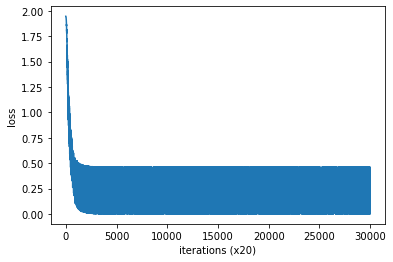

In [71]:
trainer.plot()

### 顯示稠密向量，即字詞的分散式表示
### 表示 '詞意' 的向量

In [74]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 2.389781  -2.8504655  2.2916067 -4.7344084 -1.4360737]
say [ 0.02170205 -2.1931672  -0.8495333  -0.40349588  0.91346484]
yes [ 1.507059   -0.35953155  1.4704247   2.423219   -2.120432  ]
but [-0.02165045  2.193178   -1.0363437   0.10960815 -2.7591264 ]
i [ 1.5337352  -0.35026103  1.4699728   2.4575305  -2.1293223 ]
no [ 2.4032457 -2.8421452  2.2646062 -4.77022   -1.423683 ]
. [-1.37976    -4.9060893  -0.38826877 -0.46008205  3.914595  ]
